In [1]:
import numpy as np
import pandas as pd

## Obtain Test and Train data

In [2]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/csv_files/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/csv_files/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [4]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [5]:
X_train=train.drop(['subject','Activity','ActivityName'],axis=1)
y_train=train['ActivityName']

In [6]:
X_test=test.drop(['subject','Activity','ActivityName'],axis=1)
y_test=test['ActivityName']

In [7]:
print('X_train and y_train : ({},{})'.format(X_train.shape,y_train.shape))
print('X_test and y_test : ({},{})'.format(X_test.shape,y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test and y_test : ((2947, 561),(2947,))


# Labels for ploting confusion matrix

In [8]:
labels=['LAYING','SITTING','STANDING','WALKING_UPSTAIRS','WALKING_DOWNSTRAIRS']

# Function to Plot Confusion Matrix





In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation='vertical')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



# Generic Function to run any model

In [11]:
from datetime import datetime
def perform_model(model,X_train,y_train,X_test,y_test,class_labels,cm_normalize=True,\
                  print_cm=True,cm_cmap=plt.cm.Greens):
  # to store result at various phases
  results={}

  #time at which model start training
  train_start_time=datetime.now()
  print('training the model..')
  model.fit(X_train,y_train)
  print('Done \n \n')
  train_end_time=datetime.now()
  results['training_time']= train_end_time - train_start_time
  print('training_tiem(HH:MM:SS:ms) - {}\n\n'.format(results['training_time']))


  #predict test data
  print('predicting test data')
  test_start_time=datetime.now()
  y_pred=model.predict(X_test)
  test_end_time=datetime.now()
  print('Done \n \n')
  results['testing_time']= test_end_time - test_start_time
  print('testing_tiem(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
  results['predicted']=y_pred

  #calculating overall accuracy of model
  accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
  results['accuracy']=accuracy
  print('........................')
  print('|      Accuracy         |')
  print('.........................')
  print('\n    {}\n\n'.format(accuracy))

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  results['confusion_matrix']=cm
  if print_cm:
    print('.........................')
    print('|    Confusion_matrix     |')
    print('.........................')
    print('\n    {}'.format(cm))

  #plot confusion matrix
  plt.figure(figsize=(8,8))
  plt.grid(False)
  plot_confusion_matrix(cm,classes=class_labels,normalize=True,title='Normalized confusion matrix',cmap=cm_cmap)
  plt.show()

  #get classification report
  print('....................................')
  print('|      Classification Report        |')
  print('.....................................')
  classification=classification_report(y_test,y_pred)
  results['classification_report']=classification
  print(classification)


  #add train model to result
  results['model']= model

  return results

# Method to print grid search attributes

In [12]:
def print_grid_search_attributes(model):
  #estimator that give highest score among all estimator formaed in gridsearch
  print('...............................')
  print('|      Best Estimator          |')
  print('...............................')
  print('\n\t{}\n'.format(model.best_estimator_))


  #parameter that give best result while performing grid search
  print('...............................')
  print('|      Best Parameter          |')
  print('...............................')
  print('\tparameter of best estimator : \n\n\t{}\n'.format(model.best_params_))

  #number od cross validation split
  print('...................................... ')
  print('|    Number of CrossValidation sets    |')
  print('...............................')
  print('\n\t Total number of cross validation sets :{}\n'.format(model.n_splits_))


  # Average cross validation score of the best estimator from grid search
  print('...............................')
  print('|      Best Score         |')
  print('...............................')
  print('\n\t Average cross validation score of the best estimator : \n\n\t{}\n'.format(model.best_score_))



# Logistic Regression with Grid Search

In [13]:
from sklearn import linear_model
from sklearn import metrics

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done 
 

training_tiem(HH:MM:SS:ms) - 0:05:35.971351


predicting test data
Done 
 

testing_tiem(HH:MM:SS:ms) - 0:00:00.022561


........................
|      Accuracy         |
.........................

    0.9630132337970818


.........................
|    Confusion_matrix     |
.........................

    [[537   0   0   0   0   0]
 [  2 434  52   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 493   3   0]
 [  0   0   1   3 408   8]
 [  0   0   0  24   0 447]]


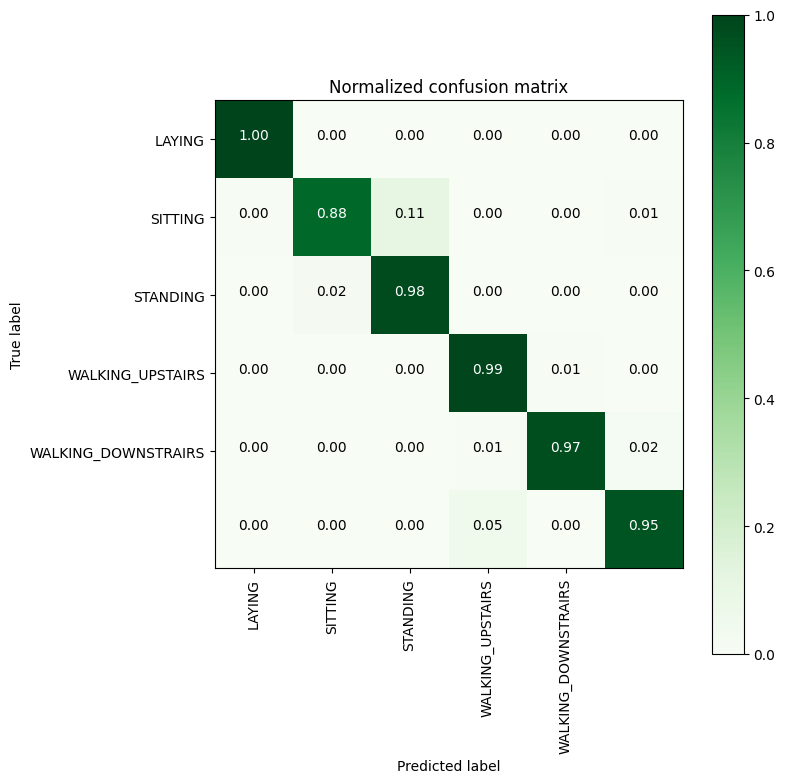

....................................
|      Classification Report        |
.....................................
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [14]:
from sklearn.model_selection import GridSearchCV
#start gridsearch
parameters={'C':[0.01,0.1,1,10,20,30],'penalty':['l2']}
log_reg=linear_model.LogisticRegression(max_iter=1000)
log_reg_grid=GridSearchCV(log_reg,param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_results= perform_model(log_reg_grid,X_train,y_train,X_test,y_test,class_labels=labels)

In [15]:
print_grid_search_attributes(log_reg_grid_results['model'])

...............................
|      Best Estimator          |
...............................

	LogisticRegression(C=20, max_iter=1000)

...............................
|      Best Parameter          |
...............................
	parameter of best estimator : 

	{'C': 20, 'penalty': 'l2'}

...................................... 
|    Number of CrossValidation sets    |
...............................

	 Total number of cross validation sets :3

...............................
|      Best Score         |
...............................

	 Average cross validation score of the best estimator : 

	0.9426027971368066



# Linear SVC with grid search

In [16]:
from sklearn.svm import LinearSVC

In [17]:
parameters={'C':[0.125,0.5,1,2,6,16]}

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Done 
 

training_tiem(HH:MM:SS:ms) - 0:02:30.737661


predicting test data
Done 
 

testing_tiem(HH:MM:SS:ms) - 0:00:00.044495


........................
|      Accuracy         |
.........................

    0.9670851713607058


.........................
|    Confusion_matrix     |
.........................

    [[537   0   0   0   0   0]
 [  2 429  57   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


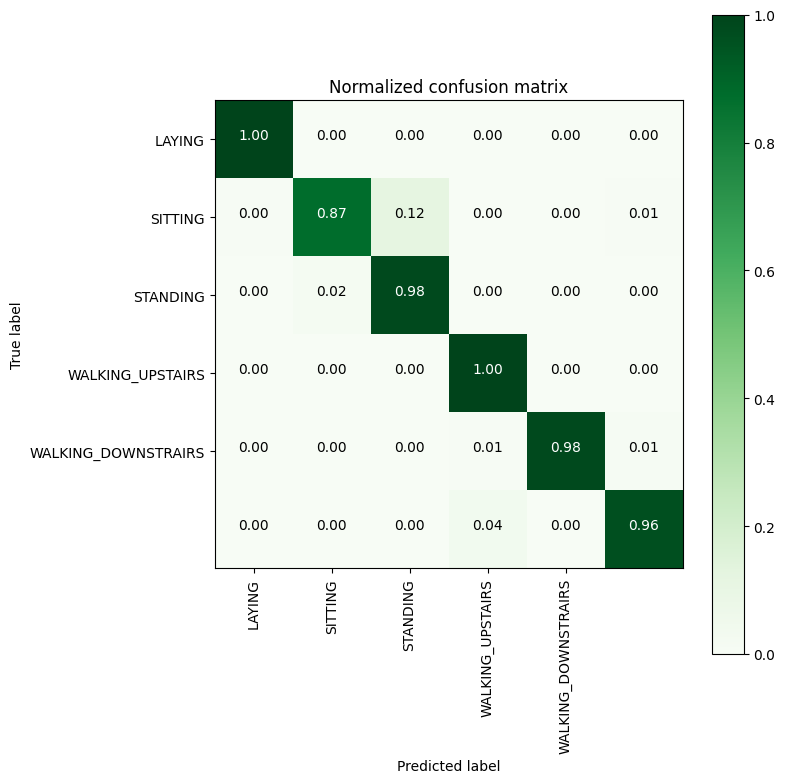

....................................
|      Classification Report        |
.....................................
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [19]:
lr_svc=LinearSVC(tol=0.00005)
lr_svc_grid=GridSearchCV(lr_svc,param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results=perform_model(lr_svc_grid,X_train,y_train,X_test,y_test,class_labels=labels)

In [20]:
print_grid_search_attributes(lr_svc_grid_results['model'])

...............................
|      Best Estimator          |
...............................

	LinearSVC(C=0.5, tol=5e-05)

...............................
|      Best Parameter          |
...............................
	parameter of best estimator : 

	{'C': 0.5}

...................................... 
|    Number of CrossValidation sets    |
...............................

	 Total number of cross validation sets :5

...............................
|      Best Score         |
...............................

	 Average cross validation score of the best estimator : 

	0.9420644940505095



# kernel SVM with grid search

In [21]:
from sklearn.svm import SVC

In [22]:
parameters={'C':[2,8,16],'gamma':[0.0078125,0.125,2]}

training the model..
Done 
 

training_tiem(HH:MM:SS:ms) - 0:09:49.658124


predicting test data
Done 
 

testing_tiem(HH:MM:SS:ms) - 0:00:02.376070


........................
|      Accuracy         |
.........................

    0.9626739056667798


.........................
|    Confusion_matrix     |
.........................

    [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


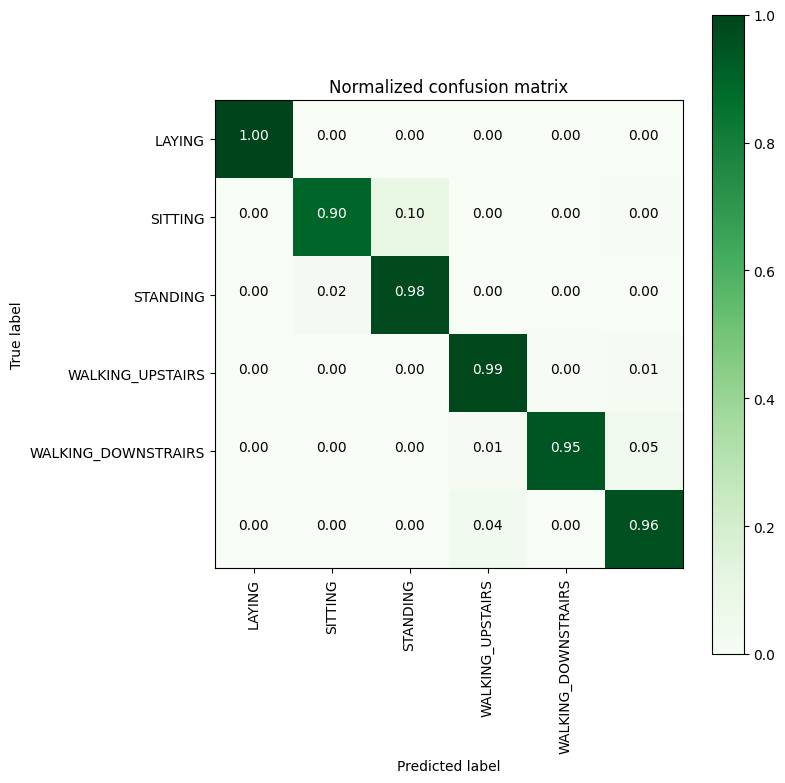

....................................
|      Classification Report        |
.....................................
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [23]:
svm=SVC(kernel='rbf')
svm_grid=GridSearchCV(svm,param_grid=parameters,n_jobs=-1)
svm_grid_results=perform_model(svm_grid,X_train,y_train,X_test,y_test,class_labels=labels)

In [38]:
print_grid_search_attributes(svm_grid_results['model'])

...............................
|      Best Estimator          |
...............................

	SVC(C=16, gamma=0.0078125)

...............................
|      Best Parameter          |
...............................
	parameter of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

...................................... 
|    Number of CrossValidation sets    |
...............................

	 Total number of cross validation sets :5

...............................
|      Best Score         |
...............................

	 Average cross validation score of the best estimator : 

	0.9447834551903698



# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
parameters={'max_depth':np.arange(3,10,2)}


training the model..
Done 
 

training_tiem(HH:MM:SS:ms) - 0:00:43.199337


predicting test data
Done 
 

testing_tiem(HH:MM:SS:ms) - 0:00:00.016736


........................
|      Accuracy         |
.........................

    0.8646080760095012


.........................
|    Confusion_matrix     |
.........................

    [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  12 347  61]
 [  0   0   0  73  29 369]]


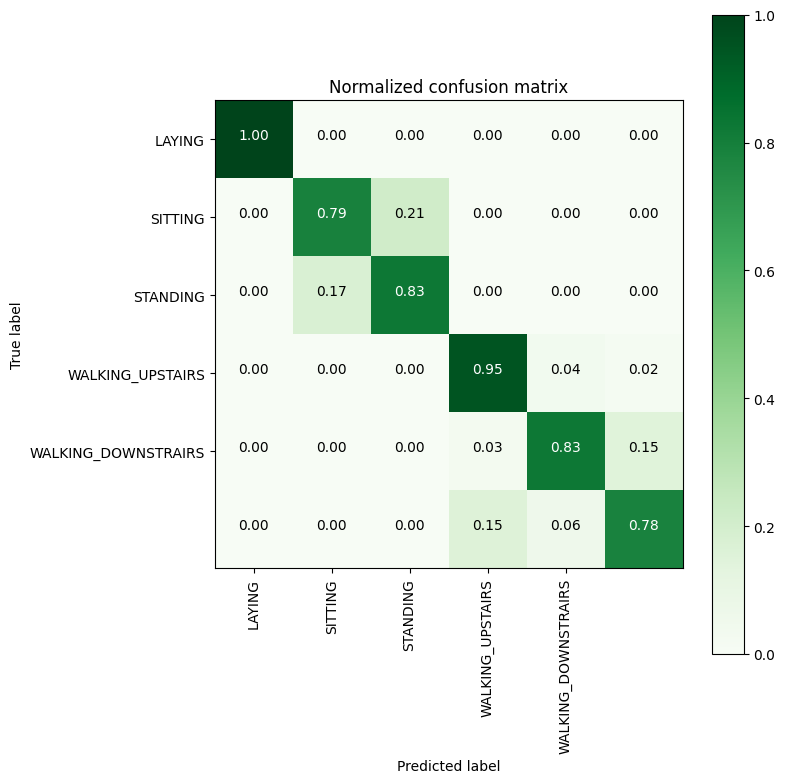

....................................
|      Classification Report        |
.....................................
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.83      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [27]:
dt=DecisionTreeClassifier()
dt_grid=GridSearchCV(dt,param_grid=parameters,n_jobs=-1)
dt_grid_results=perform_model(dt_grid,X_train,y_train,X_test,y_test,class_labels=labels)

In [28]:
print_grid_search_attributes(dt_grid_results['model'])

...............................
|      Best Estimator          |
...............................

	DecisionTreeClassifier(max_depth=7)

...............................
|      Best Parameter          |
...............................
	parameter of best estimator : 

	{'max_depth': 7}

...................................... 
|    Number of CrossValidation sets    |
...............................

	 Total number of cross validation sets :5

...............................
|      Best Score         |
...............................

	 Average cross validation score of the best estimator : 

	0.8521564764587005



# Random Foreset Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
parameters={'n_estimators':np.arange(10,201,20),'max_depth':np.arange(3,15,2)}

training the model..
Done 
 

training_tiem(HH:MM:SS:ms) - 0:32:35.120901


predicting test data
Done 
 

testing_tiem(HH:MM:SS:ms) - 0:00:00.089722


........................
|      Accuracy         |
.........................

    0.9205972175093315


.........................
|    Confusion_matrix     |
.........................

    [[537   0   0   0   0   0]
 [  0 429  62   0   0   0]
 [  0  50 482   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  23 353  44]
 [  0   0   0  36   6 429]]


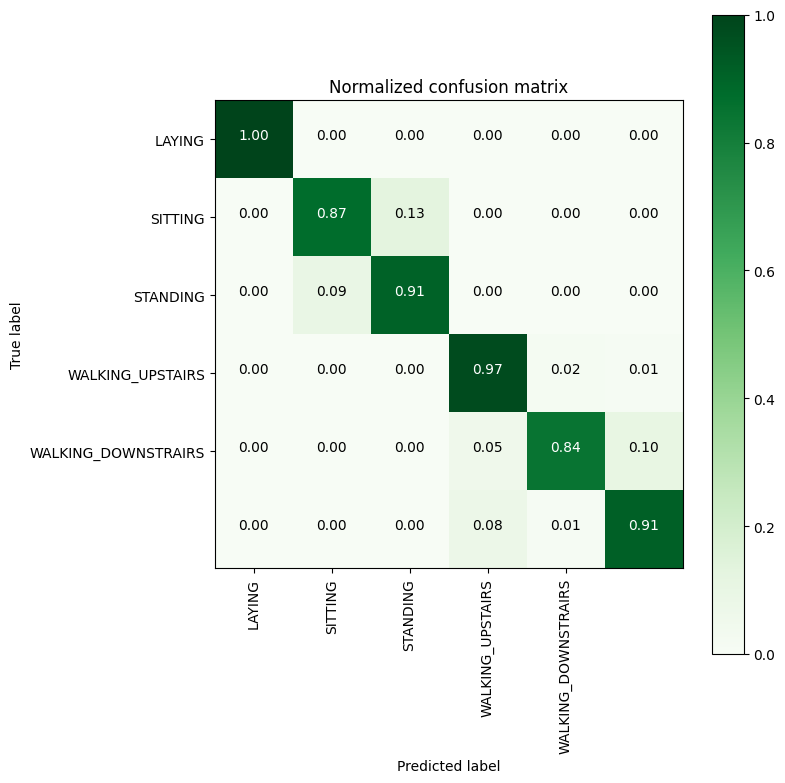

....................................
|      Classification Report        |
.....................................
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.87      0.88       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.90      0.91      0.91       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [31]:
rfc=RandomForestClassifier()
rfc_grid=GridSearchCV(rfc,param_grid=parameters,n_jobs=-1)
rfc_grid_results=perform_model(rfc_grid,X_train,y_train,X_test,y_test,class_labels=labels)

In [32]:
print_grid_search_attributes(rfc_grid_results['model'])

...............................
|      Best Estimator          |
...............................

	RandomForestClassifier(max_depth=11, n_estimators=150)

...............................
|      Best Parameter          |
...............................
	parameter of best estimator : 

	{'max_depth': 11, 'n_estimators': 150}

...................................... 
|    Number of CrossValidation sets    |
...............................

	 Total number of cross validation sets :5

...............................
|      Best Score         |
...............................

	 Average cross validation score of the best estimator : 

	0.9201619519323705



# Comparing All Models

In [36]:
print('\n                   Accuracy          Error')
print('.............................................')
print('Logistic Regression : {:.04}%         {:.04}%'.format(log_reg_grid_results['accuracy'] * 100, \
                                                            100 -(log_reg_grid_results['accuracy'] * 100)))

print('Linear svc          : {:.04}%         {:.04}%'.format(lr_svc_grid_results['accuracy'] * 100, \
                                                            100 -(lr_svc_grid_results['accuracy'] * 100)))

print('rbf svm classifier  : {:.04}%         {:.04}%'.format(svm_grid_results['accuracy'] * 100, \
                                                            100 -(svm_grid_results['accuracy'] * 100)))

print(' DecisionTree       : {:.04}%         {:.04}%'.format(dt_grid_results['accuracy'] * 100, \
                                                            100 -(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%         {:.04}%'.format(rfc_grid_results['accuracy'] * 100, \
                                                            100 -(rfc_grid_results['accuracy'] * 100)))


                   Accuracy          Error
.............................................
Logistic Regression : 96.3%         3.699%
Linear svc          : 96.71%         3.291%
rbf svm classifier  : 96.27%         3.733%
 DecisionTree       : 86.46%         13.54%
Random Forest       : 92.06%         7.94%
